In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [368]:
# =========================
# パラメータ設定
# =========================
SEED = 42
N_DAYS = 365
FREQ_HOURS = 1
N = N_DAYS * 24

# 1) 定常値
BASE_LEVEL = 50.0

# 2) 周期成分
DAILY_AMPLITUDE = 5.0
DAILY_PERIOD = 24*7  # hours

# 3) 慣性（自己相関）
PHI = 0.99  # 0.9〜0.99で調整

# 4) ノイズ
NOISE_SIGMA = 0.3

# 異常データ
abonormal_indices = [2000, 5000,6000]
ABNORMAL_MAGNITUDE = 20.0

#　異常予兆データ
pre_abnormal_indices = [1500, 4000]
PRE_ABNORMAL_MAGNITUDE = 15

In [369]:
# =========================
# 乱数・時間軸
# =========================
rng = np.random.default_rng(SEED)
time_index = pd.date_range(
    start="2024-01-01 00:00",
    periods=N,
    freq="H"
)

t = np.arange(N)

C:\Users\keisu\AppData\Local\Temp\ipykernel_27424\4188986827.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_index = pd.date_range(


In [370]:
# =========================
# 各成分の生成
# =========================

# 定常値
b = np.full(N, BASE_LEVEL)

# 周期値
s = DAILY_AMPLITUDE * np.sin(2 * np.pi * t / DAILY_PERIOD)

# ノイズ
noise = rng.normal(0, NOISE_SIGMA, size=N)

In [ ]:
# =========================
# 慣性を含めた状態更新
# =========================
mu = np.zeros(N)
mu[0] = BASE_LEVEL  # 初期値

for i in range(1, N):
        mu[i] = (
        PHI * mu[i - 1]
        + (1 - PHI) * (b[i] + s[i])
        + noise[i]
        )    
    

In [ ]:
x = np.zeros(N)
x[0] = BASE_LEVEL  # 初期値

for i in range(1, N):
    x[i] = mu[i] 

In [ ]:
# =========================
# DataFrame化
# =========================
df = pd.DataFrame(
    {
        "sensor_value": x,
        "base": b,
        "seasonal": s,
        "mu": mu
    },
    index=time_index
)

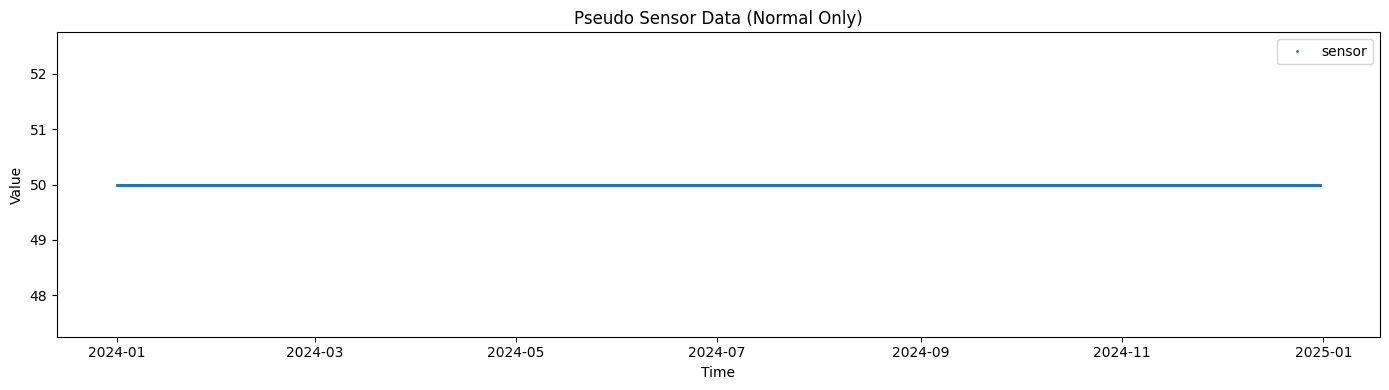

In [379]:
# =========================
# 可視化
# =========================
plt.figure(figsize=(14, 4))
plt.plot(df.index, df["base"], label="sensor",linestyle="none", marker="o", markersize=1)
plt.title("Pseudo Sensor Data (Normal Only)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

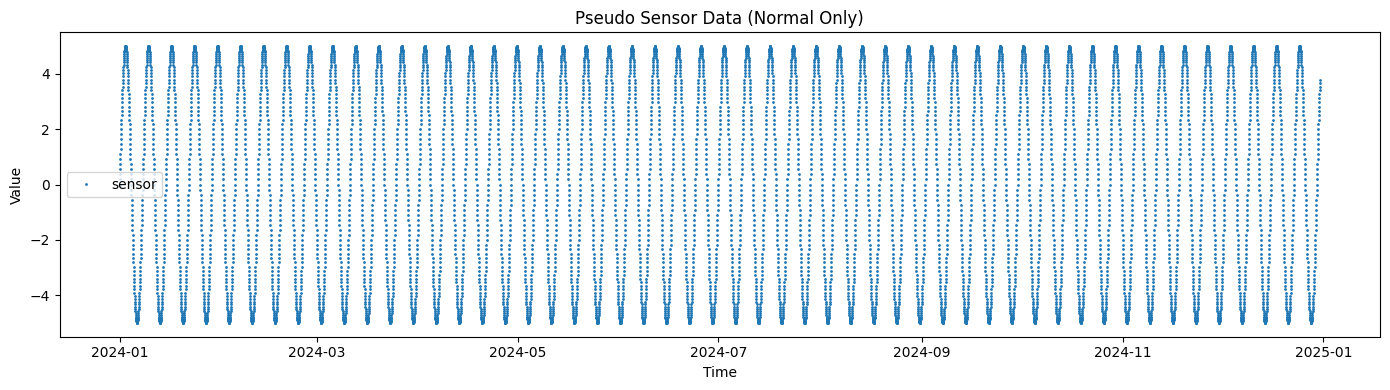

In [380]:
# =========================
# 可視化
# =========================
plt.figure(figsize=(14, 4))
plt.plot(df.index, df["seasonal"], label="sensor", linestyle="none", marker="o", markersize=1)
plt.title("Pseudo Sensor Data (Normal Only)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

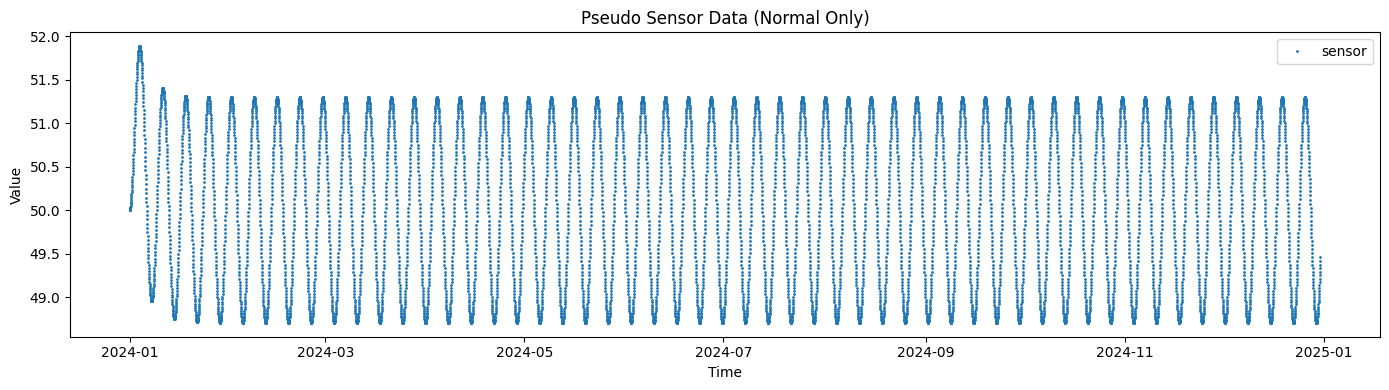

In [381]:
# =========================
# 可視化
# =========================
plt.figure(figsize=(14, 4))
plt.plot(df.index, df["mu"], label="sensor", linestyle="none", marker="o", markersize=1)
plt.title("Pseudo Sensor Data (Normal Only)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

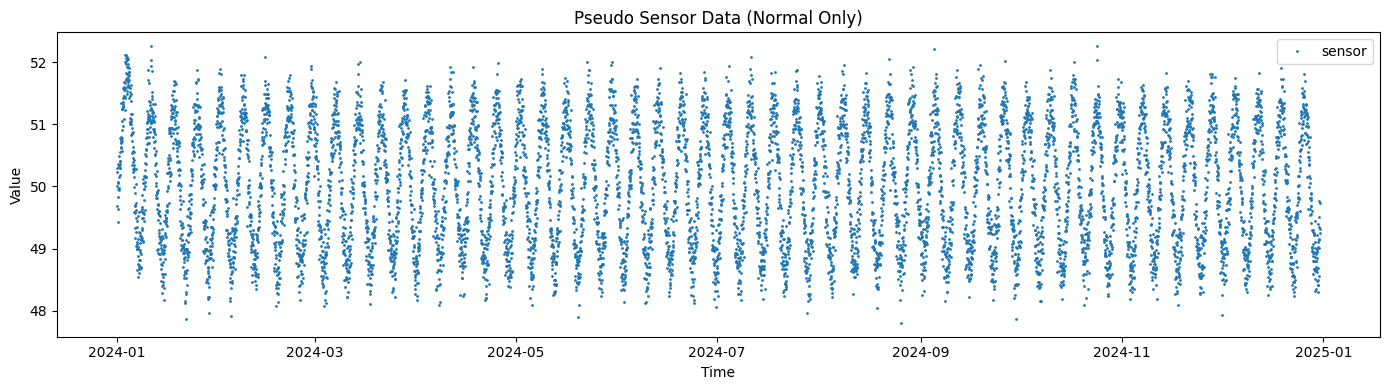

In [382]:
# =========================
# 可視化
# =========================
plt.figure(figsize=(14, 4))
plt.plot(df.index, df["sensor_value"], label="sensor", linestyle="none", marker="o", markersize=1)
plt.title("Pseudo Sensor Data (Normal Only)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()